In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from classes_n import *
from init_vars import *


demand_p1 = Demand(P1)

combined_p1 = Inventory(demand_p1)


In [4]:
demand_p1.demand[50000]

6655

demand_p1.demands

In [ ]:
print(INVENTORY_MODE)

combined_p1.inventory_level


2


[403426]

In [ ]:
combined_p1.put(100)
combined_p1.get(50)
combined_p1.inventory_level

[390879, 390929]

### Testing the warehouse

In [ ]:
demand_p1, demand_p2 = Demand(P1), Demand(P2)

combined_p1, combined_p2 = Inventory(demand_p1), Inventory(demand_p2)

warehouse = Warehouse(combined_p1, combined_p2)

In [ ]:
#order = {"product":"p1", "amount": 40_000_000}
order = [0, 10_000]

In [ ]:
warehouse.current_warehouse_level

18422789

In [ ]:
warehouse.is_possible_to_store(order)

True

### Testing the Inventory class inside the Warehouse

In [ ]:
warehouse.products[1].inventory_level

[18035362]

### Testing Demand class inside the Warehouse

In [ ]:
warehouse.products[1].demand_class.demand

array([      0,  267872,       0,  323477,  500839,       0,       0,
        895557,       0,       0,       0,       0,  470539,       0,
        730020,       0,       0,  248231,  767266,  220383,       0,
        474482,  753917,       0, 1770712,  730416,  655379,  817243,
             0,       0,       0,  867910,       0,       0, 1017545,
       2940514,  497560, 2086639,  977078,  287387, 1051490,       0,
             0, 1534078,  838956,       0,  466768,  186674, 1447425,
             0,  446606, 1343385,       0,       0,  407208,       0,
             0,       0,  390488, 1385229,       0,  339298,       0,
        677076,       0, 1176413, 1549471,  618264, 1530621,       0,
       1071272,  793149,       0, 1245502,       0,       0,       0,
        618503, 1344165,  584019,       0,  523094,       0,       0,
        426594, 1759971,       0,       0,       0,  326813,       0,
        825083, 1894240,       0,  582588, 2498001,       0,  731274,
       1231647,     

### Testing Machine class

In [ ]:
machine = Machine(warehouse)

In [ ]:
#order = {"product": "p1", "amount": 10_000}
order = [0, 10_000]

In [ ]:
machine.is_possible_to_produce(order)

True

In [ ]:
machine.produce(order)
machine.produce(order)
machine.produce(order)
machine.produce(order)

0

In [ ]:
warehouse.products[0].inventory_level

[387427, 397427, 407427, 417427, 427427]

In [ ]:
warehouse.products[1].inventory_level

[18035362, 18035362, 18035362, 18035362, 18035362]

In [ ]:
machine.fulfill()

10

In [ ]:
warehouse.products[0].inventory_level

[387427, 397427, 407427, 417427, 427427]

In [ ]:
warehouse.products[1].inventory_level

[18035362, 18035362, 18035362, 18035362, 18035362]

In [ ]:
import numpy as np
np.random.lognormal(254.629, 1)
lognorm_int(254.629, 1)

array([113.])

In [ ]:
mu0 = 100_000_000 * (0.22/86400)
sigma0 = 10e-5

mu = np.log(mu0**2 / np.sqrt(sigma0**2 + mu0**2))
sigma = np.sqrt(np.log(sigma0**2 / mu0**2 + 1))

print(np.mean(np.random.lognormal(mu, sigma, 100000)))
print(np.mean(lognorm_int(mu0, sigma0, size=100000)))

254.62962970167544
255.0


In [ ]:
# Profs code
def lognorm(mu, varcoef) -> float:
    """
    scales the target expected value mu and varcoef = sigma/mu to the 
    embedded normal distribution with mu0 and sigma0 and returns
    the corresponding output
    beauty of lognorm: is always > 0 
    """
    mu0 = np.log(mu / np.sqrt(np.power(varcoef, 2) + 1.0))
    sigma0 = np.sqrt(np.log(np.power(varcoef, 2) + 1.0))
    return random.lognormvariate(mu0, sigma0)

sum = 0
for i in range(100000):
    sum += lognorm(mu0, sigma0)
print(sum/100000)

254.6297108735997


In [ ]:
not 1

False

### Testing the environment

In [ ]:
from environment_ddpg_n import *

In [ ]:
env = Production_DDPG_Env()

In [ ]:
env.machine.warehouse.current_warehouse_level

19171119

In [ ]:
env.action_space

MultiDiscrete([       2 50000000])

In [ ]:
env.action_space.sample()
env.machine.is_possible_to_produce([1, 1000000000])
env.machine.warehouse.is_possible_to_store([1, 100])

True

In [ ]:
import gym
from gym import spaces
import numpy as np

test_box = spaces.Box(low=0, high=10, dtype=np.int32)
#possible idea for the action space:
test_box_2 = spaces.Tuple(
    (spaces.Discrete(2), spaces.Box(low=0, high=300000, dtype=np.int32))
)

test_box_3 = spaces.Tuple(
    (spaces.Discrete(2), spaces.Discrete(3))
)

test_box_4 = spaces.Dict(
    {
        "a": spaces.Discrete(2), 
        "b": spaces.Discrete(3)
    }
)

print(spaces.utils.flatdim(test_box_2))
print(spaces.utils.flatten_space(test_box_4))
print(spaces.utils.flatten(test_box_4, test_box_4.sample()))
print(test_box_4.shape)

3
Box(0, 1, (5,), int64)
[0 1 1 0 0]
None


In [ ]:
test_box_2.sample()[1][0]

89153

In [ ]:
test_box_5 = spaces.MultiDiscrete([2, 50_000_000])
test_box_5.sample()

array([       1, 35283231])

In [ ]:
env.action_space.sample()

array([       1, 31780193])

In [ ]:
env.observation_space.sample()

array([13752060, 40338683, 11099065, 15214828])

## Testing the full environment

In [ ]:
from environment_ddpg_n import *

env = Production_DDPG_Env()
env.reset()

for i in range(1_000_000):
    if i%100 == 0:
        print(i)
    env.step(env.action_space.sample())

In [ ]:
env._get_obs()

(373315, 17987949, 0, 0)

In [ ]:
env.reset()

((387726, 17560874, 0, 0), {})

In [ ]:
env.action_space.__len__()

2

# Testing utils.py

In [ ]:
env.action_space[1].n

50000000

In [ ]:
from ddpg_utils import *

gaus = GaussianNoise(env.action_space)

In [ ]:
gaus.get_action(env.action_space.sample())

array([       0., 31681329.])

In [ ]:
memory = Memory(1000)

obs_prev, _ = env.reset()

action = env.action_space.sample()

obs, reward, terminated, _, _ = env.step(action)

In [ ]:
for i in range(100):
    memory.push(obs_prev, action, reward, obs, terminated)

In [ ]:
memory.sample(10)

([(402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0),
  (402338, 18927136, 26466, 0)],
 [array([       1, 40665062]),
  array([       1, 40665062]),
  array([       1, 40665062]),
  array([       1, 40665062]),
  array([       1, 40665062]),
  array([       1, 40665062]),
  array([       1, 40665062]),
  array([       1, 40665062]),
  array([       1, 40665062]),
  array([       1, 40665062])],
 [array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0])],
 [(402338, 18927136, 12363, 976079),
  (402338, 18927136, 12363, 976079),
  (402338, 18927136, 12363, 976079),
  (402338, 18927136, 12363, 976079),
  (402338, 18927136, 12363, 976079),
  (402338, 18927136, 12363, 976079),
  (40

# Testing models.py

In [ ]:
from ddpg_models import *

## Critic

In [ ]:
num_states = env.observation_space.shape[0]
num_actions = env.action_space.shape[0]

critic = Critic(num_states + num_actions, 12, 2)

state, _ = env.reset()
state = np.array(state)
action = env.action_space.sample()

In [ ]:
state_torch = torch.from_numpy(state).to(torch.float32)
action_torch = torch.from_numpy(action).to(torch.float32)
#torch.cat((state_torch, action_torch), 0).shape
print(state_torch.dtype, "---", action_torch.dtype)

torch.float32 --- torch.float32


In [ ]:
critic.forward(state_torch, action_torch)

tensor([  -79303.4297, -1072358.2500], grad_fn=<ViewBackward0>)

## Actor

In [ ]:
actor = Actor(num_states, 12, 2)

actor.forward(state_torch)

tensor([-1.,  1.], grad_fn=<TanhBackward0>)

# Testing ddpg.py

In [ ]:
from ddpg_ddpg import *

ddpg_agent = DDPGagent(env)

In [ ]:
ddpg_agent.get_action(env.observation_space.sample())

-1.0

---

In [ ]:
import numpy as np

listt = np.random.normal(10000, 1000, 1_000_000)
print(np.mean(listt), np.std(listt))

sum_std = 0
sum_mean = 0
listts = np.array_split(listt, 100000)
sum_std = np.array([np.std(listt) for listt in listts])
sum_mean = np.array([np.mean(listt) for listt in listts])
print(np.mean(sum_mean), np.mean(sum_std))

10000.170343165255 999.7670794096549
10000.170343165255 922.3567605257119


---

# Testing classses_n changed

In [ ]:
import numpy as np
from classes_n import *
from init_vars import *

machine = Machine(
            Warehouse(
                Inventory(Demand(P1)),
                Inventory(Demand(P2))
            )
        )

In [ ]:
for i in range(240):
    if machine.t >= machine.finish_time:
        qty = np.random.randint(10_000, 1_000_000)
    print("Day:", machine.t//24)
    print("Hour:", machine.t%24)
    print("Finish time:", machine.finish_time)
    print("Quantity:", qty)
    print("Machine:", machine.produce([0, qty]))
    print("Fulfilled qty error code:", machine.fulfill())
    print("\n----------------\n")

Day: 0
Hour: 0
Finish time: 0
Quantity: 925984
Machine: 0
Fulfilled qty error code: 10

----------------

Day: 0
Hour: 1
Finish time: 58.65507370650142
Quantity: 925984
Machine: 10
Fulfilled qty error code: 10

----------------

Day: 0
Hour: 2
Finish time: 58.65507370650142
Quantity: 925984
Machine: 10
Fulfilled qty error code: 10

----------------

Day: 0
Hour: 3
Finish time: 58.65507370650142
Quantity: 925984
Machine: 10
Fulfilled qty error code: 10

----------------

Day: 0
Hour: 4
Finish time: 58.65507370650142
Quantity: 925984
Machine: 10
Fulfilled qty error code: 10

----------------

Day: 0
Hour: 5
Finish time: 58.65507370650142
Quantity: 925984
Machine: 10
Fulfilled qty error code: 10

----------------

Day: 0
Hour: 6
Finish time: 58.65507370650142
Quantity: 925984
Machine: 10
Fulfilled qty error code: 10

----------------

Day: 0
Hour: 7
Finish time: 58.65507370650142
Quantity: 925984
Machine: 10
Fulfilled qty error code: 10

----------------

Day: 0
Hour: 8
Finish time: 58.65

It seems that is works fine with hour-checking method. 

# Testing environment_dqn

In [ ]:
from environment_dqn_n import *

env = Production_DQN_Env()

In [ ]:
for i in range(241):
    #if observation[3] != 0:
    #    print("Prev:", env.machine.t//24, env.machine.t%24)
    action = env.action_space.sample()
    action = np.array([1, 10])
    observation, reward, done, _, _ = env.step(action)
    if observation[3] != 0:
        print("Day:", env.machine.t//24)
        print("Hour:", env.machine.t%24)
        print("Action:", action)
        print("Current prod order:", env.machine.current_order)
        print("Step:", (observation, reward, done))
        print("\n----------------\n")
    
    env.inc_t()
    if done:
        env.reset()


    exit code prod:  0
    exit code fulf (p1, p2):  (10, 10)
    exit code stor:  10
    service level p1:  0.9999999989999999
    service level p2:  0.9999999989999999
    exit code prod:  10
    exit code fulf (p1, p2):  (10, 10)
    exit code stor:  10
    service level p1:  0.9999999989999999
    service level p2:  0.9999999989999999
    exit code prod:  10
    exit code fulf (p1, p2):  (10, 10)
    exit code stor:  10
    service level p1:  0.9999999989999999
    service level p2:  0.9999999989999999
    exit code prod:  10
    exit code fulf (p1, p2):  (10, 10)
    exit code stor:  10
    service level p1:  0.9999999989999999
    service level p2:  0.9999999989999999
    exit code prod:  10
    exit code fulf (p1, p2):  (10, 10)
    exit code stor:  10
    service level p1:  0.9999999989999999
    service level p2:  0.9999999989999999
    exit code prod:  10
    exit code fulf (p1, p2):  (10, 10)
    exit code stor:  10
    service level p1:  0.9999999989999999
    service level

Observation space:
- machine if free or not: it works
- exit codes for prod, fulf and stor work

Other stuff:
- Time step probably solved.
- Reward works correctly now.

In [ ]:
env.action_space[1].n

5000

## Testing SkipStep

In [2]:
from environment_dqn_n import *

skip_env = SkipStep(Production_DQN_Env(), 24)

for i in range(20):
    action = skip_env.action_space.sample()
    observation, reward, done, _, _ = skip_env.step(action)
    print("Day:", skip_env.env.machine.t//24)
    print("Hour:", skip_env.env.machine.t%24)
    print("Done", done)
    print("Action:", action)
    print("Current prod order:", skip_env.env.machine.current_order)
    print("Step:", (observation, reward, done))
    print("\n----------------\n")
    if done:
        skip_env.reset()

Day: 1
Hour: 0
Done False
Action: [   0 1431]
Current prod order: (0, 14310000)
Step: ((89895, 4332911, 0, 0, 0), 0.0, False)

----------------

Day: 2
Hour: 0
Done False
Action: [  0 321]
Current prod order: (0, 14310000)
Step: ((89895, 4148755, 0, 184156, 0), 0.7174233333333333, False)

----------------

Day: 3
Hour: 0
Done False
Action: [   1 1087]
Current prod order: (0, 14310000)
Step: ((89895, 3674892, 0, 473863, 0), 0.7490142, False)

----------------

Day: 4
Hour: 0
Done False
Action: [  1 530]
Current prod order: (0, 14310000)
Step: ((89895, 3674892, 0, 0, 0), 0.0, False)

----------------

Day: 5
Hour: 0
Done False
Action: [   1 1146]
Current prod order: (0, 14310000)
Step: ((89895, 2624548, 0, 1050344, 0), 0.8190371333333333, False)

----------------

Day: 6
Hour: 0
Done False
Action: [   1 1044]
Current prod order: (0, 14310000)
Step: ((89895, 2624548, 0, 0, 0), 0.0, False)

----------------

Day: 7
Hour: 0
Done False
Action: [  1 720]
Current prod order: (0, 14310000)
Step

SkipStep seems to work

# Testing double_dqn_agent

## Testing act function

In [ ]:
from double_dqn_agent import *
from environment_dqn_n import *

env = Production_DQN_Env()
agent = DoubleDQNAgent(5, 2, "test")

In [ ]:
agent.exploration_rate = 0
agent.act()

<bound method DoubleDQNAgent.act of <double_dqn_agent.DoubleDQNAgent object at 0x153836d10>>

---

Testing again DDPG algorithm with the new environment (with bins)

# Testing ddpg_utils.py 
noise may not be necessary for bin version 

In [ ]:
from ddpg.ddpg_utils import *
from environment_dqn_n import *

env = Production_DQN_Env()
gaus = GaussianNoise(env.action_space)

In [ ]:
gaus.get_action(env.action_space.sample())

array([   0., 1694.])

In [ ]:
memory = Memory(1000)
obs_prev, _ = env.reset()

for i in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, _, _ = env.step(action)
    memory.push(obs_prev, action, reward, obs, terminated)
    obs_prev = obs

In [ ]:
memory.sample(10)

([(396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False)],
 [array([   1, 1256]),
  array([   0, 4445]),
  array([  0, 864]),
  array([   0, 4798]),
  array([   0, 2158]),
  array([   1, 2558]),
  array([   1, 3785]),
  array([   1, 1567]),
  array([   1, 2252]),
  array([   1, 1676])],
 [array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0]),
  array([0])],
 [(396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),
  (396029, 18112111, 0, 0, False),

# Testing ddpg_models.py

In [ ]:
from ddpg.ddpg_models import *
from environment_dqn_n import *
import torch

env = Production_DQN_Env()

## Critic

In [ ]:
num_states = env.observation_space.shape[0]
num_actions = env.action_space.shape[0]

critic = Critic(num_states + num_actions, 12, 1)

state, _ = env.reset()
state = torch.FloatTensor(state).unsqueeze(0)
action = torch.FloatTensor(env.action_space.sample()).unsqueeze(0)


In [ ]:
state_torch = torch.from_numpy(state).to(torch.float32)
action_torch = torch.from_numpy(action).to(torch.float32)
#torch.cat((state_torch, action_torch), 0).shape
print(state_torch.dtype, "---", action_torch.dtype)

torch.float32 --- torch.float32


In [ ]:
print(state.shape, "---", action.shape)

torch.Size([1, 5]) --- torch.Size([1, 2])


In [ ]:
critic.forward(state, action)

tensor([[-360518.9688]], grad_fn=<AddmmBackward0>)

## Actor

In [ ]:
actor = Actor(num_states, 12, 2)

actor.forward(state)

p torch.Size([1, 1])
qty torch.Size([1, 1])


tensor([[1.0000e+00],
        [5.0000e+03]], grad_fn=<CatBackward0>)

# Testing ddpg_ddpg.py

In [ ]:
from ddpg.ddpg_ddpg import *
from environment_dqn_n import *

env = Production_DQN_Env()

In [ ]:
agent = DDPGagent(env)

agent.get_action(env.observation_space.sample())

array([[   0., 5000.]], dtype=float32)

# Testing ddpg all together

In [1]:
#import sys
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ddpg.ddpg_ddpg import DDPGagent
from ddpg.ddpg_utils import *
from environment_dqn_n import *

env = Production_DQN_Env()

agent = DDPGagent(env)
noise = GaussianNoise(env.action_space)
batch_size = 16
rewards = []
avg_rewards = []

for episode in range(10):
    print("Episode:", episode)
    state, _ = env.reset()
    #noise.reset()
    episode_reward = 0
    
    step = 0
    done = False
    while not done:
        print("\tStep:", step)
        step += 1
        action = agent.get_action(state)
        action = noise.get_action(action)
        #print("\tAction", action)
        new_state, reward, done, _, _ = env.step(action) 
        agent.memory.push(state, action, reward, new_state, done)
        
        if len(agent.memory) > batch_size:
            agent.update(batch_size)        
        
        state = new_state
        episode_reward += reward

        if done:
            print("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

Episode: 0
	Step: 0
	Action [1 0]
	Step: 1
	Action [1 0]
	Step: 2
	Action [1 0]
	Step: 3
	Action [1 0]
	Step: 4
	Action [1 2]
	Step: 5
	Action [1 0]
	Step: 6
	Action [1 2]
	Step: 7
	Action [1 0]
	Step: 8
	Action [1 1]
	Step: 9
	Action [1 0]
	Step: 10
	Action [1 0]
	Step: 11
	Action [1 3]
	Step: 12
	Action [1 0]
	Step: 13
	Action [1 0]
	Step: 14
	Action [1 1]
	Step: 15
	Action [1 0]
	Step: 16
	Action [1 0]
	Step: 17
	Action [1 2]
	Step: 18
	Action [1 0]
	Step: 19
	Action [1 1]
	Step: 20
	Action [1 3]
	Step: 21
	Action [1 0]
	Step: 22
	Action [1 2]


/Users/alex/Documents/Project_Module/project-module-repo/environment_new_Alex/classes_n.py:348: RuntimeWarning: divide by zero encountered in scalar divide
  varcoef = MACHINE_VARCOEF / np.sqrt(order[1]),
/Users/alex/Documents/Project_Module/project-module-repo/environment_new_Alex/base_functions_n.py:33: RuntimeWarning: divide by zero encountered in log
  mu0 = np.log(mu / np.sqrt(varcoef ** 2 + 1.0))
/Users/alex/Documents/Project_Module/project-module-repo/environment_new_Alex/ddpg/ddpg_ddpg.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_5ae0635zuj/croot/pytorch-select_1700511177724/work/torch/csrc/utils/tensor_new.cpp:264.)
  actions = torch.FloatTensor(actions) #.transpose(0,1) # CHANGE HERE IF NECESSARY


	Step: 23
	Action [1 0]
	Step: 24
	Action [1 1]
	Step: 25
	Action [1 0]
	Step: 26
	Action [1 0]
	Step: 27
	Action [1 0]
	Step: 28
	Action [1 1]
	Step: 29
	Action [1 0]
	Step: 30
	Action [1 0]
	Step: 31
	Action [1 0]
	Step: 32
	Action [1 0]
	Step: 33
	Action [1 0]
	Step: 34
	Action [1 1]
	Step: 35
	Action [1 1]
	Step: 36
	Action [1 0]
	Step: 37
	Action [1 0]
	Step: 38
	Action [1 2]
	Step: 39
	Action [1 2]
	Step: 40
	Action [1 0]
	Step: 41
	Action [1 0]
	Step: 42
	Action [1 0]
	Step: 43
	Action [1 0]
	Step: 44
	Action [1 0]
	Step: 45
	Action [1 0]
	Step: 46
	Action [1 0]
	Step: 47
	Action [1 1]
	Step: 48
	Action [1 0]
	Step: 49
	Action [1 0]
	Step: 50
	Action [1 0]
	Step: 51
	Action [1 0]
	Step: 52
	Action [1 1]
	Step: 53
	Action [1 1]
	Step: 54
	Action [1 0]
	Step: 55
	Action [1 0]
	Step: 56
	Action [1 0]
	Step: 57
	Action [1 0]
	Step: 58
	Action [1 0]
	Step: 59
	Action [1 1]
	Step: 60
	Action [1 0]
	Step: 61
	Action [1 0]
	Step: 62
	Action [1 0]
	Step: 63
	Action [1 2]
	Step: 64
	Actio

KeyboardInterrupt: 

# Testing ddpg_optimized

## Testing ddpg_memory

In [1]:
from ddpg_optimized.ddpg_memory import *

In [2]:
sample_batch_indices(29, 30, 10)

/Users/alex/Documents/Project_Module/project-module-repo/environment_bins/ddpg_optimized/ddpg_memory.py:24: UserWarning: Not enough data to sample without replacement. Sampling with replacement. Or consider increasing the warm-up phase.
  warnings.warn("Not enough data to sample without replacement. Sampling with replacement. Or consider increasing the warm-up phase.")


ValueError: low >= high

In [3]:
ringbuffer = RingBuffer(100)

print(ringbuffer.__len__)
ringbuffer.append(100)
print(ringbuffer.length)
print(ringbuffer.start)
print(ringbuffer.data)
#print(ringbuffer.__getitem__(1))
ringbuffer.append(200)
#print(ringbuffer.__getitem__(0))

<bound method RingBuffer.__len__ of <ddpg_optimized.ddpg_memory.RingBuffer object at 0x10a5a94d0>>
1
0
[100, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [4]:
from environment_dqn_n import *

env = Production_DQN_Env()

state, _ = env.reset()
action = env.action_space.sample()
new_state, reward, done, _, _ = env.step(action)

In [5]:
memory = Memory(100, ignore_episode_boundaries=False)

for i in range(100_000):
    action = env.action_space.sample()
    new_state, reward, done, _, _ = env.step(action)
    memory.append(new_state, action, reward, done)

In [6]:
len(memory.get_recent_state(new_state))

100

In [7]:
memory.get_config()

{'window_length': 100, 'ignore_episode_boundaries': False}

In [8]:
seq_memory = SequentialMemory(limit = 1000, window_length = 100)

In [9]:
for i in range(100_000):
    action = env.action_space.sample()
    new_state, reward, done, _, _ = env.step(action)
    seq_memory.append(new_state, action, reward, done)

SAMPLING WITH REPLACEMENT TAKES A LOT OF TIME with numpy Generator choice.

Better it is used random_integers.

In [10]:
seq_memory.sample_and_split(100_000)

/Users/alex/Documents/Project_Module/project-module-repo/environment_bins/ddpg_optimized/ddpg_memory.py:24: UserWarning: Not enough data to sample without replacement. Sampling with replacement. Or consider increasing the warm-up phase.
  warnings.warn("Not enough data to sample without replacement. Sampling with replacement. Or consider increasing the warm-up phase.")


(array([[  396740, 18086666,        0, ...,        0,        0,        0],
        [  396740, 18086666,        0, ...,        0,        0,        0],
        [  396740, 18086666,        0, ...,        0,        0,        0],
        ...,
        [  396740, 18086666,        0, ...,        0,        0,        0],
        [  396740, 18086666,        0, ...,        0,        0,        0],
        [  396740, 18086666,        0, ...,        0,        0,        0]]),
 array([[   0, 1783],
        [   0, 4243],
        [   0, 4741],
        ...,
        [   0, 2424],
        [   0, 3452],
        [   0,  170]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[  396740, 18086666,        0, ...,        0,        0,        0],
        [  396740, 18086666,        0, ...,        0,        0,        0],
        [  396740, 18086666,        0, ...,        0,        0,        0],
        ...,
        [  396740, 18086666,        0, ...,        0,    

In [44]:
seq_memory.get_config()

{'window_length': 100, 'ignore_episode_boundaries': False, 'limit': 1000}

In [12]:
episode_memory = EpisodeParameterMemory(limit = 1000, window_length = 100)

for i in range(100_000):
    action = env.action_space.sample()
    new_state, reward, done, _, _ = env.step(action)
    episode_memory.append(new_state, action, reward, done)

In [22]:
episode_memory.finalize_episode(0)

In [23]:
episode_memory.sample(100)

In [24]:
episode_memory.nb_entries

6

ddpg_memory in ddpg_optimized works fine

## Testing ddpg_model.py 

In [1]:
from ddpg_optimized.ddpg_model import *

In [2]:
model = create_mlp_model([100, 200, 300, 60])
model

[Linear(in_features=100, out_features=200, bias=True),
 ReLU(),
 Linear(in_features=200, out_features=300, bias=True),
 ReLU(),
 Linear(in_features=300, out_features=60, bias=True),
 ReLU()]

In [3]:
model = nn.Sequential(*model)
next(model.modules())

Sequential(
  (0): Linear(in_features=100, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=60, bias=True)
  (5): ReLU()
)

In [42]:
model[0].weight.data.size()

torch.Size([200, 100])

### Actor

In [2]:
actor = Actor(5, 3)
actor.model[0].weight

Parameter containing:
tensor([[-3.6893e-01,  1.2075e-01,  2.6393e-01,  3.5447e-01,  3.8020e-01],
        [ 1.5328e-01,  4.4047e-01,  4.0696e-01,  3.8591e-01, -3.6172e-01],
        [-2.5388e-01, -2.7602e-01, -2.7999e-01,  1.9987e-01, -1.5289e-01],
        [-2.2114e-01, -1.8753e-01,  3.5113e-01, -1.2996e-02, -8.9455e-02],
        [ 3.1275e-01,  3.0019e-01,  2.6155e-01,  1.2636e-01,  2.5767e-01],
        [-2.4020e-01,  4.3107e-01,  2.1815e-01,  3.5613e-01,  4.4609e-01],
        [ 2.3636e-01,  1.5007e-01, -9.3496e-02, -2.9533e-01,  2.1528e-01],
        [ 1.7376e-01,  5.1022e-02,  3.7583e-01, -2.6119e-01,  3.1042e-01],
        [-2.5205e-01, -6.1893e-02, -3.0744e-01,  2.4976e-01, -7.4264e-02],
        [ 2.2927e-02, -3.3509e-01,  1.1494e-01,  1.6290e-01,  2.9898e-01],
        [-3.1914e-02,  1.1874e-01, -1.2970e-01,  4.4249e-01,  1.8345e-01],
        [-3.0278e-01, -1.6568e-01, -2.3001e-01, -3.4852e-01, -2.6366e-01],
        [ 2.9626e-01,  2.8651e-01, -2.2966e-01,  3.5458e-01,  2.8937e-01],
   

In [3]:
actor.init_weights()
actor.model[0].weight

Parameter containing:
tensor([[ 0.0241,  0.0073, -0.1115,  0.1012,  0.0363],
        [ 0.0935, -0.0690, -0.0568, -0.1158, -0.0255],
        [ 0.1133, -0.0811, -0.1054,  0.0576, -0.0661],
        [-0.0194,  0.0566,  0.1180,  0.0970, -0.0236],
        [ 0.1027,  0.0126,  0.0222, -0.0652,  0.0246],
        [ 0.0665,  0.0929,  0.0191, -0.0929, -0.0963],
        [-0.0126,  0.0742,  0.1218,  0.0991,  0.0900],
        [-0.0256,  0.0440, -0.0770,  0.0878,  0.0063],
        [-0.0113,  0.0292, -0.1156, -0.1175,  0.0018],
        [ 0.1194,  0.1092,  0.0546,  0.0166, -0.1221],
        [ 0.1083,  0.0819, -0.1167, -0.0475, -0.0733],
        [ 0.0988, -0.0270,  0.0391,  0.0531,  0.0273],
        [ 0.1078, -0.0192, -0.0813,  0.0975,  0.0453],
        [ 0.1134,  0.0172, -0.0940, -0.0470, -0.1189],
        [ 0.1079,  0.0283,  0.0920, -0.0200, -0.0409],
        [-0.0322,  0.0393,  0.1115, -0.0456, -0.0361],
        [-0.0827,  0.0593,  0.0710,  0.0579, -0.0375],
        [-0.0371, -0.0779, -0.0619,  0.0704

In [8]:
from environment_dqn_n import *
from ddpg_optimized.ddpg_model import *

env = Production_DQN_Env()
actor = Actor(env.observation_space.shape[0])

state, _ = env.reset()
action = env.action_space.sample()
new_state, reward, done, _, _ = env.step(action)

In [9]:
actor.forward(torch.Tensor(state).to(torch.float32).unsqueeze(0))

(tensor([[0., 0.]], grad_fn=<SigmoidBackward0>),
 tensor([[2959.9385]], grad_fn=<ReluBackward0>))

### Critic

In [1]:
from environment_dqn_n import *
from ddpg_optimized.ddpg_model import *

env = Production_DQN_Env()
critic = Critic(env.observation_space.shape[0], env.action_space.shape[0])

state, _ = env.reset()
action = env.action_space.sample()
new_state, reward, done, _, _ = env.step(action)

In [10]:
state_tensor = torch.Tensor(state).to(torch.float32).unsqueeze(0)
action_tensor = torch.Tensor(action).to(torch.float32).unsqueeze(0)
print(state_tensor.shape, "---", action_tensor.shape)
state_action = torch.cat((state_tensor, action_tensor), 1)
print(state_action.shape)

critic.forward(state_action)

torch.Size([1, 5]) --- torch.Size([1, 2])
torch.Size([1, 7])


tensor([[596167.5625]], grad_fn=<AddmmBackward0>)

# Testing ddpg_random_process.py

In [8]:
from ddpg_optimized.ddpg_random_process import *

#without sigma min
noise = GaussianWhiteNoiseProcess(size = 1_000_000)
arr_sample = noise.sample()
print(np.mean(arr_sample))
print(np.std(arr_sample))

3.6509424576020296e-05
1.500295374407714


In [9]:
from ddpg_optimized.ddpg_random_process import *

#with sigma min
noise = GaussianWhiteNoiseProcess(size = 1_000_000, sigma_min=0.5)
arr_sample = noise.sample()
print(np.mean(arr_sample))
print(np.std(arr_sample))

-0.003484948962143776
1.4996149034569064


# Testing ddpg_utils.py

In [17]:
%load_ext autoreload
%autoreload 2

from ddpg_optimized.ddpg_utils import *
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
to_numpy(torch.Tensor([1, 2, 3]))

array([1., 2., 3.], dtype=float32)

In [7]:
to_tensor(np.array([1., 2., 3.]), requires_grad=True)

tensor([1., 2., 3.], grad_fn=<ToCopyBackward0>)

In [10]:
from environment_dqn_n import *
from ddpg_optimized.ddpg_model import *

env = Production_DQN_Env()
critic = Critic(env.observation_space.shape[0], env.action_space.shape[0])
critic_copy = Critic(env.observation_space.shape[0], env.action_space.shape[0])

soft_update(critic_copy.model, critic.model, 0.5)

In [14]:
hard_update(critic_copy.model, critic.model)

In [18]:
parent_dir = "/Users/alex/Documents/Project_Module/project-module-repo/experiments/environment_bins/ddpg_optimized"
get_output_folder(parent_dir, type(env).__name__)

'/Users/alex/Documents/Project_Module/project-module-repo/experiments/environment_bins/ddpg_optimized/Production_DQN_Env-run1'

utils.py works fine

In [4]:
import numpy as np

np.array([]).reshape(10, 0)

array([], shape=(10, 0), dtype=float64)

# Testing ddpg_evaluator.py 

it will be tested when all other code is done

# Testing ddpg_ddpg.py

In [11]:
from init_vars import *
from ddpg_optimized.ddpg_ddpg import *
from environment_dqn_n import *
from ddpg_optimized.ddpg_memory import *


env = SkipStep(Production_DQN_Env(), skip = 24)
agent = DDPG_agent(5, 2, args)
memory = SequentialMemory(limit = args.memory_size, window_length = args.window_length)


In [12]:
for i in range(10_000):
    action = env.action_space.sample() 
    action[1] = action[1] // 1_000
    obs, reward, done, _, _ = env.step(action)
    memory.append(obs, action, reward, done)

/Users/alex/Documents/Project_Module/project-module-repo/environment_bins/classes_n.py:348: RuntimeWarning: divide by zero encountered in scalar divide
  varcoef = MACHINE_VARCOEF / np.sqrt(order[1]),
/Users/alex/Documents/Project_Module/project-module-repo/environment_bins/base_functions_n.py:33: RuntimeWarning: divide by zero encountered in log
  mu0 = np.log(mu / np.sqrt(varcoef ** 2 + 1.0))


# Testing ddpg_evaluator.py

# Testing ddpg_main.py + related files

In [2]:
%load_ext autoreload
%autoreload 2

<class 'ddpg_optimized.ddpg_ddpg.DDPG_agent'>.<function DDPG_agent.__init__ at 0x13ccb27a0> took 0.169848 seconds to execute.
<class 'ddpg_optimized.ddpg_ddpg.DDPG_agent'>.<function DDPG_agent.reset at 0x13ccb34c0> took 0.000002 seconds to execute.
<class 'ddpg_optimized.ddpg_ddpg.DDPG_agent'>.<function DDPG_agent.random_action at 0x13ccb3240> took 0.000057 seconds to execute.
<class 'ddpg_optimized.ddpg_ddpg.DDPG_agent'>.<function DDPG_agent.observe at 0x13ccb3100> took 0.000009 seconds to execute.
<class 'ddpg_optimized.ddpg_ddpg.DDPG_agent'>.<function DDPG_agent.select_action at 0x13ccb3380> took 0.000495 seconds to execute.
<class 'ddpg_optimized.ddpg_ddpg.DDPG_agent'>.<function DDPG_agent.select_action at 0x13ccb3380> took 0.000114 seconds to execute.
<class 'ddpg_optimized.ddpg_ddpg.DDPG_agent'>.<function DDPG_agent.select_action at 0x13ccb3380> took 0.000108 seconds to execute.
<class 'ddpg_optimized.ddpg_ddpg.DDPG_agent'>.<function DDPG_agent.select_action at 0x13ccb3380> took 

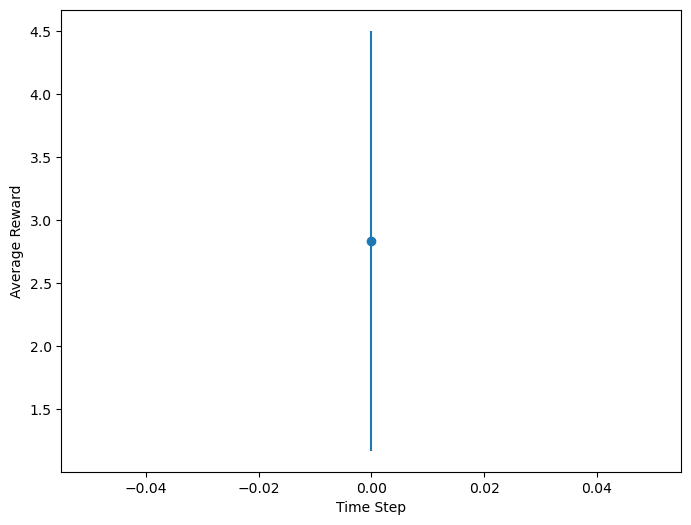

In [1]:
from ddpg_optimized.ddpg_main import *

main()